In [1]:
pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.7 MB/s 
     |████████████████████████████████| 3.1 MB 36.8 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=d1d0dd81f5a13ba24445121577f735a9d56ed03f53f88f186f6d3938fc918dde
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph


In [2]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [3]:
k_top10=pd.read_csv("k_top10_result_Email.csv")
G= nx.read_edgelist("Email.txt", nodetype = int)

In [4]:
k_top10

,Unnamed: 0,Unnamed: 0.1,DC,BC,CC,EC,TOPSIS,k_means
0,0,0,104,104,104,104,104,104
1,1,1,332,332,332,332,332,53
2,2,2,22,22,22,41,22,181
3,3,3,41,41,41,195,41,321
4,4,4,40,75,75,15,75,239
5,5,5,577,40,40,48,40,742
6,6,6,232,577,232,115,577,501
7,7,7,195,232,134,203,232,718
8,8,8,15,134,377,2,195,55
9,9,9,377,354,51,55,134,1010


In [5]:

def si_model(measure):
    top=set(k_top10[measure].values.tolist())
    model = ep.SIModel(G)
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta',0.3)
    cfg.add_model_initial_configuration("Infected", top)
    model.set_initial_status(cfg)
    iterations = model.iteration_bunch(10)
    S=[]
    I=[]
    it=[]
    for t in iterations:
        S.append(t['node_count'][0])
        I.append(t['node_count'][1])
        it.append(t['iteration'])
        if t['node_count'][1]==4039:
            break
    row=[it,I,S]
    return(row)


In [6]:
DC=[]
CC=[]
BC=[]
EC=[]
TOPSIS=[]
KMEANS=[]
#for i in r
DC.append(si_model('DC'))
CC.append(si_model('CC'))
BC.append(si_model('BC'))
EC.append(si_model('EC'))
TOPSIS.append(si_model('TOPSIS'))
KMEANS.append(si_model('k_means'))

In [11]:
DC

[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  [10, 77, 315, 668, 885, 989, 1045, 1087, 1100, 1112],
  [1123, 1056, 818, 465, 248, 144, 88, 46, 33, 21]]]

In [12]:
def Std_mean(lis):
    dc={}
    for i in range(1):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]

    for i in range(1):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][1][j])
    return dc


In [13]:
stdsDC=[]
meansDC=[]
dc=Std_mean(DC)
for i in dc:
    stdsDC.append(np.std(dc[i]))
    meansDC.append(np.mean(dc[i]))


In [14]:
dc

{0: [10],
 1: [77],
 2: [315],
 3: [668],
 4: [885],
 5: [989],
 6: [1045],
 7: [1087],
 8: [1100],
 9: [1112]}

In [15]:
stdsCC=[]
meansCC=[]
d=Std_mean(CC)
for i in d:
    stdsCC.append(np.std(d[i]))
    meansCC.append(np.mean(d[i]))

stdsEC=[]
meansEC=[]
d=Std_mean(EC)
for i in d:
    stdsEC.append(np.std(d[i]))
    meansEC.append(np.mean(d[i]))

stdsBC=[]
meansBC=[]
d=Std_mean(BC)
for i in d:
    stdsBC.append(np.std(d[i]))
    meansBC.append(np.mean(d[i]))

stdsTOPSIS=[]
meansTOPSIS=[]
d=Std_mean(TOPSIS)
for i in d:
    stdsTOPSIS.append(np.std(d[i]))
    meansTOPSIS.append(np.mean(d[i]))

dc=Std_mean(DC)
cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)




In [16]:
stdsKMEANS=[]
meansKMEANS=[]
d=Std_mean(KMEANS)
for i in d:
    stdsKMEANS.append(np.std(d[i]))
    meansKMEANS.append(np.mean(d[i]))
    
    

In [17]:
dc=Std_mean(DC)
cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)
kmeans=Std_mean(KMEANS)


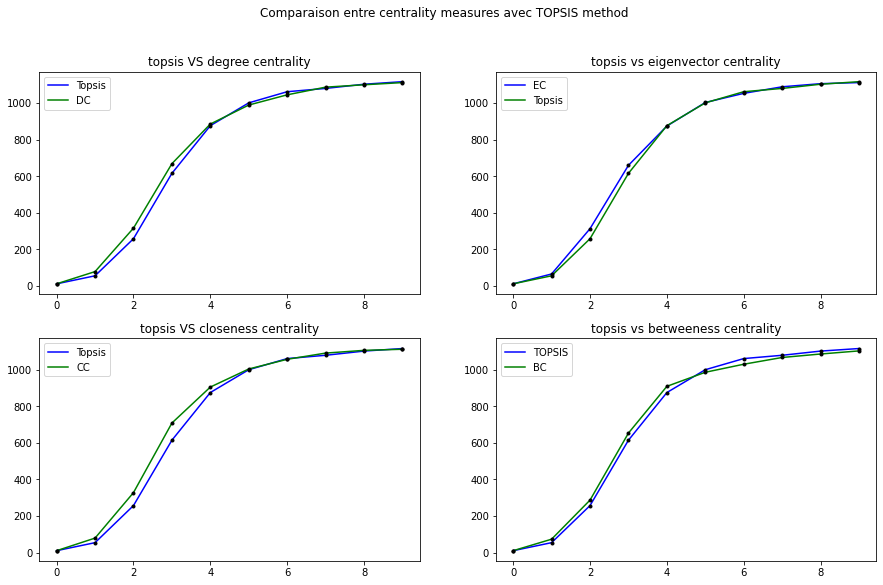

In [18]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS degree centrality')
ax[0, 0].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[0, 0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 0].plot(sorted(dc.keys()) , meansDC, label='DC',c='green')
ax[0, 0].errorbar(dc.keys() , meansDC, yerr=stdsDC, fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('topsis VS closeness centrality')
ax[1, 0].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[1, 0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[1, 0].plot(sorted(cc.keys()) , meansCC, label='CC',c='green')
ax[1, 0].errorbar(cc.keys() , meansCC, yerr=stdsCC, fmt ='.k')

ax[1, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(sorted(ec.keys()) , meansEC, label='EC',c='blue')
ax[0, 1].errorbar(ec.keys() , meansEC, yerr=stdsEC, fmt ='.k')
ax[0, 1].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='green')
ax[0, 1].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 1].legend()

ax[1, 1].plot(sorted(topsis.keys()), meansTOPSIS, label='TOPSIS',c='blue')
ax[1, 1].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[1, 1].plot(sorted(bc.keys()) , meansBC, label='BC',c='green')
ax[1, 1].errorbar(bc.keys() , meansBC, yerr=stdsBC, fmt ='.k')
ax[1, 1].set_title('topsis vs betweeness centrality')
ax[1, 1].legend()


fig.suptitle('Comparaison entre centrality measures avec TOPSIS method')
plt.show()

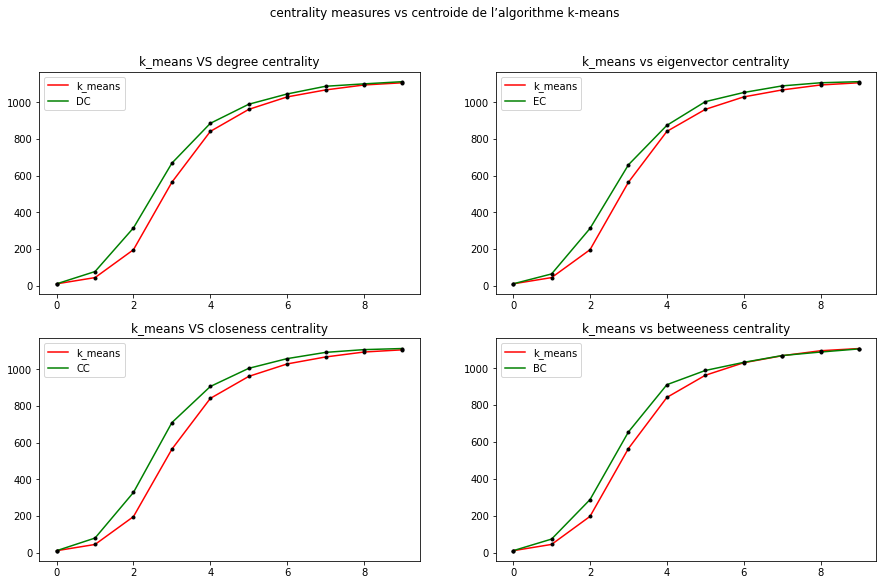

In [19]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('k_means VS degree centrality')
ax[0, 0].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[0, 0].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[0, 0].plot(sorted(dc.keys()) , meansDC, label='DC',c='green')
ax[0, 0].errorbar(dc.keys() , meansDC, yerr=stdsDC, fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('k_means VS closeness centrality')
ax[1, 0].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[1, 0].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[1, 0].plot(sorted(cc.keys()) , meansCC, label='CC',c='green')
ax[1, 0].errorbar(cc.keys() , meansCC, yerr=stdsCC, fmt ='.k')

ax[1, 0].legend()

ax[0, 1].set_title('k_means vs eigenvector centrality')
ax[0, 1].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[0, 1].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[0, 1].plot(sorted(ec.keys()) , meansEC, label='EC',c='green')
ax[0, 1].errorbar(ec.keys() , meansEC, yerr=stdsEC, fmt ='.k')
ax[0, 1].legend()

ax[1, 1].set_title('k_means vs betweeness centrality')
ax[1,1].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[1,1].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[1, 1].plot(sorted(bc.keys()) , meansBC, label='BC',c='green')
ax[1, 1].errorbar(bc.keys() , meansBC, yerr=stdsBC, fmt ='.k')
ax[1, 1].legend()


fig.suptitle(' centrality measures vs centroide de l’algorithme k-means ')
plt.show()

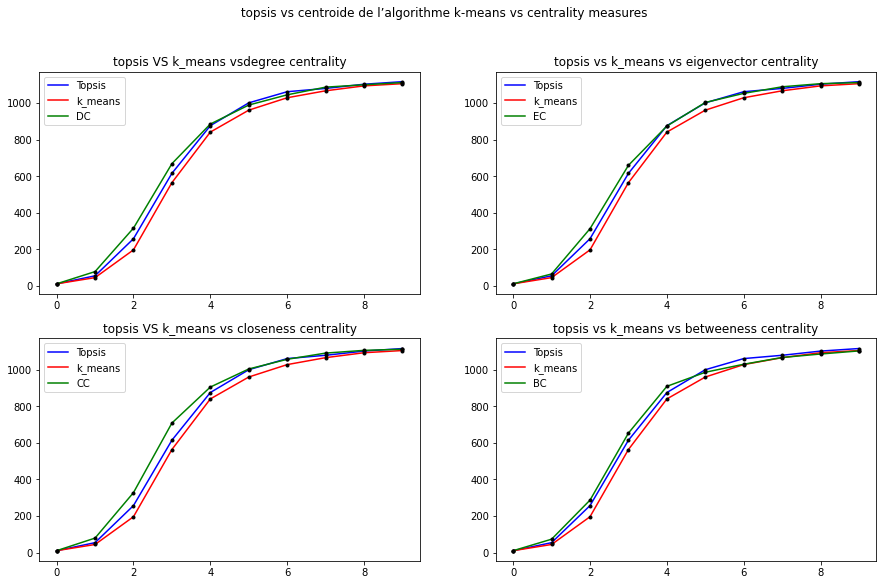

In [20]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS k_means vsdegree centrality')
ax[0,0].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[0,0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 0].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[0, 0].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[0, 0].plot(sorted(dc.keys()) , meansDC, label='DC',c='green')
ax[0, 0].errorbar(dc.keys() , meansDC, yerr=stdsDC, fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('topsis VS k_means vs closeness centrality')
ax[1,0].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[1,0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[1, 0].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[1, 0].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[1, 0].plot(sorted(cc.keys()) , meansCC, label='CC',c='green')
ax[1, 0].errorbar(cc.keys() , meansCC, yerr=stdsCC, fmt ='.k')

ax[1, 0].legend()

ax[0, 1].set_title('topsis vs k_means vs eigenvector centrality')
ax[0, 1].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[0, 1].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 1].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[0, 1].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[0, 1].plot(sorted(ec.keys()) , meansEC, label='EC',c='green')
ax[0, 1].errorbar(ec.keys() , meansEC, yerr=stdsEC, fmt ='.k')
ax[0, 1].legend()

ax[1, 1].set_title('topsis vs k_means vs betweeness centrality')
ax[1, 1].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[1, 1].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[1,1].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[1,1].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[1, 1].plot(sorted(bc.keys()) , meansBC, label='BC',c='green')
ax[1, 1].errorbar(bc.keys() , meansBC, yerr=stdsBC, fmt ='.k')
ax[1, 1].legend()


fig.suptitle(' topsis vs centroide de l’algorithme k-means vs centrality measures ')
plt.show()

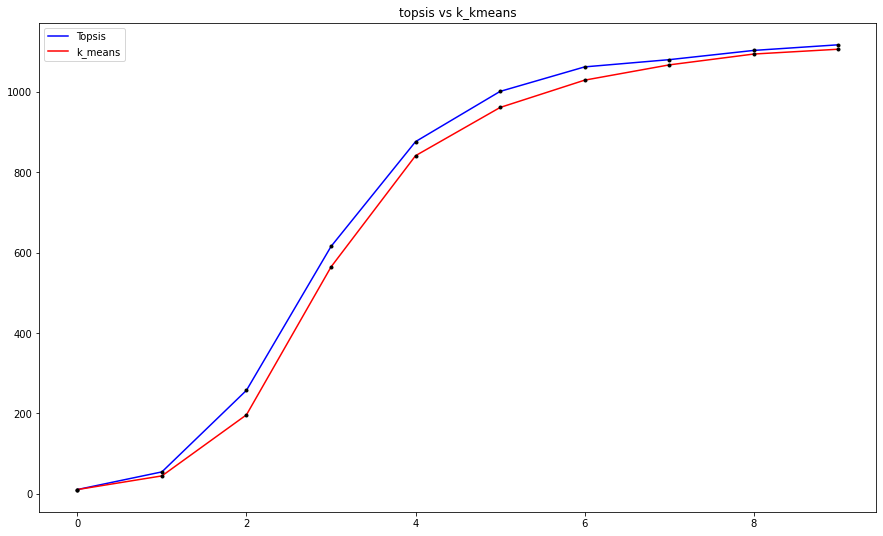

In [21]:
fig = plt.subplots(figsize=(15, 9))

plt.plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
plt.errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
plt.plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
plt.errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
plt.title('topsis vs k_kmeans')

plt.legend()